In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [5]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv')
df.head()

,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710


In [7]:
df['group'].unique()

array([1, 2, 3])

In [8]:
group1 = df.loc[df['group'] == 1]
group2 = df.loc[df['group'] == 2]
group3 = df.loc[df['group'] == 3]

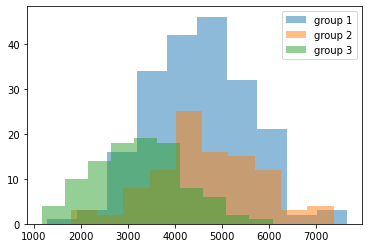

ShapiroResult(statistic=0.9932351112365723, pvalue=0.4915737509727478)
ShapiroResult(statistic=0.994020402431488, pvalue=0.9413013458251953)
ShapiroResult(statistic=0.9901381731033325, pvalue=0.675767183303833)


In [20]:
plt.hist(group1['t1'], alpha=0.5)
plt.hist(group2['t1'], alpha=0.5)
plt.hist(group3['t1'], alpha=0.5)
plt.legend(['group 1', 'group 2', 'group 3'])
plt.show()
print(stats.shapiro(group1['t1']))
print(stats.shapiro(group2['t1']))
print(stats.shapiro(group3['t1']))

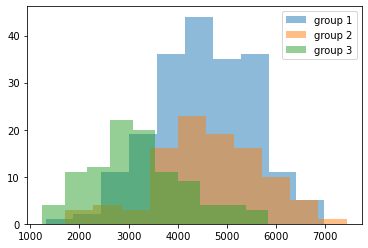

ShapiroResult(statistic=0.9955824613571167, pvalue=0.8313238024711609)
ShapiroResult(statistic=0.9911357164382935, pvalue=0.7556766271591187)
ShapiroResult(statistic=0.9781965613365173, pvalue=0.09609080106019974)


In [21]:
plt.hist(group1['t2'], alpha=0.5)
plt.hist(group2['t2'], alpha=0.5)
plt.hist(group3['t2'], alpha=0.5)
plt.legend(['group 1', 'group 2', 'group 3'])
plt.show()
print(stats.shapiro(group1['t2']))
print(stats.shapiro(group2['t2']))
print(stats.shapiro(group3['t2']))

In [22]:
# For each group, is there a significant difference between time 1 and time 2?
print(stats.ttest_rel(group1['t1'], group1['t2']))
print(stats.ttest_rel(group2['t1'], group2['t2']))
print(stats.ttest_rel(group3['t1'], group3['t2']))

Ttest_relResult(statistic=-0.31827677584963787, pvalue=0.7506087664956842)
Ttest_relResult(statistic=0.32745622415118286, pvalue=0.7440142766032991)
Ttest_relResult(statistic=0.8984773127301627, pvalue=0.37111115842334486)


In [23]:
# Is there a significant difference in the mean of all groups at time 2?
stats.f_oneway(group1['t2'], group2['t2'], group3['t2'])

F_onewayResult(statistic=67.65846945026495, pvalue=5.1893599904179e-26)

In [27]:
tukey = pairwise_tukeyhsd(endog=df['t2'], groups=df['group'], alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,99.705,0.6902,-195.9612,395.3712,False
1,3,-1341.865,0.001,-1637.5312,-1046.1988,True
2,3,-1441.57,0.001,-1782.9759,-1100.1641,True
